In [6]:

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import tree.export_graphviz
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline

SyntaxError: invalid syntax (<ipython-input-6-2d8c2201a47b>, line 11)

In [7]:
#load the breast cancer data and few EDA
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:

print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:

cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:

type(cancer.data)
cancer.data.shape

(569, 30)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

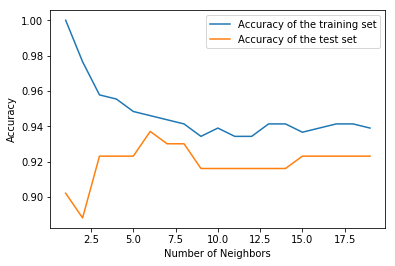

In [16]:
#----------KNN Classifier 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

#by looking at plot, best result accurs when n_neighbors is 6

In [17]:

print("Accuracy of the training set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the test set for 6NN: {:3f}".format(test_accuracy[5]))

Accuracy of the training set for 6NN: 0.946009
Accuracy of the test set for 6NN: 0.937063


In [18]:
#----------------Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))

#It seems as it does better than KNN

Accuracy on the training set: 0.955
Accuracy on the training set: 0.958


C:\Users\maddi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: x and y must have same first dimension, but have shapes (19,) and (14,)

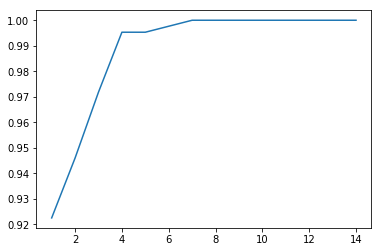

In [20]:
#----------------- Decision Tree
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

# By having larger max_depth (>5), we overfit the model into training data, so the accuracy for training set become 
# but the accuracy for test set decrease

# other parameters than can work with:
# - min_samples_leaf, max_sample_leaf
# - max_leaf_node

# by looking at plot, best result accurs when max_depth is 3

In [21]:
export_graphviz(tree, out_file='cancerTree.dot', class_names=['malignant','benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

In [23]:

print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances: [0.         0.         0.         0.         0.         0.
 0.         0.72468105 0.         0.         0.01277192 0.
 0.         0.         0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.00838371 0.03452044
 0.00985664 0.         0.         0.         0.         0.        ]


numpy.ndarray

In [24]:

# ---------------- Random Forests
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

#you can tune parameter such as:
# - n_job (how many cores)(n_job=-1 => all cores)
# - max_depth
# - max_feature


print('acc for training data: {:.3f}'.format(forest.score(X_train,y_train)))
print('acc for test data: {:.3f}'.format(forest.score(X_test,y_test)))

acc for training data: 1.000
acc for test data: 0.972
